In [1]:
from automaton import UlamWarburton
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

# Basic 

First, we examine the basic version of the automaton with the standard rules. 

/home/marcus/.local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


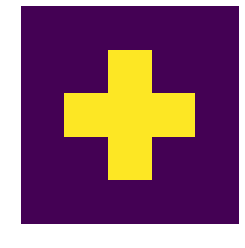

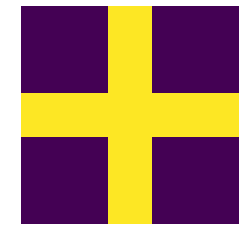

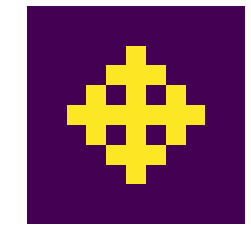

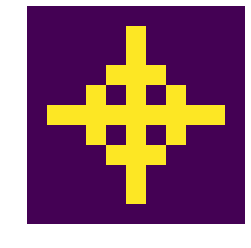

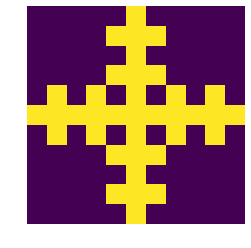

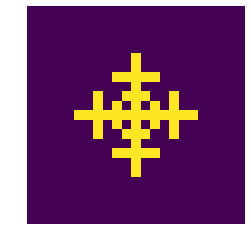

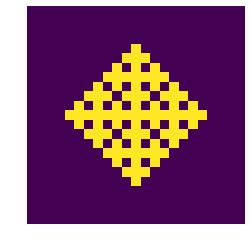

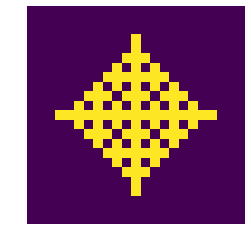

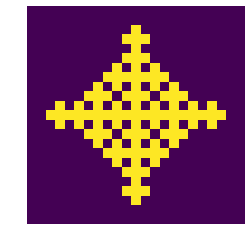

In [2]:
uw = UlamWarburton(initial_size=5)
for iteration in range(1, 10):
    uw.iterate()
    uw.show()

We can plot the number of counts for each iteration and see the general curve. 

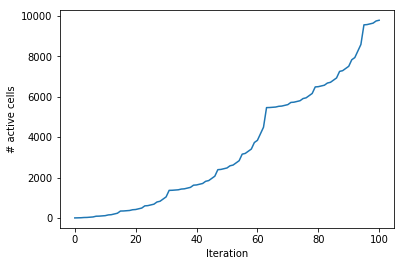

In [3]:
uw = UlamWarburton()
uw.iterate(steps=100)

counts = [np.sum(grid) for grid in uw.history]

fig, ax = plt.subplots()
ax.plot(counts)
ax.set_ylabel("# active cells")
ax.set_xlabel("Iteration")
fig.show()

# Death

What if we allow cells to deactivate after some set time? We can run that experiment. These cells are like any inactive cell then. 

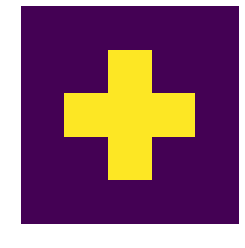

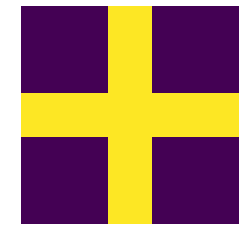

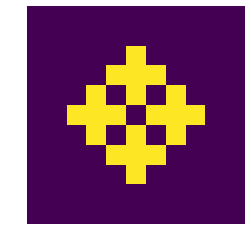

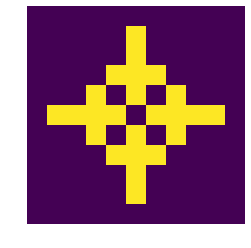

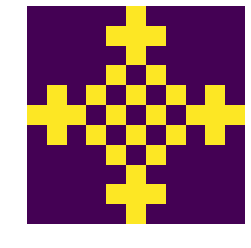

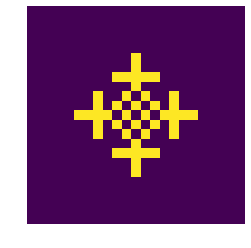

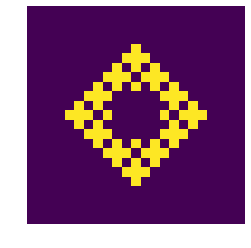

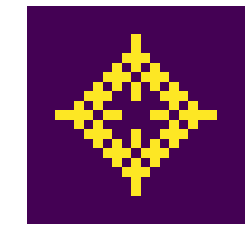

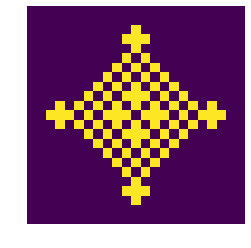

In [4]:
uw = UlamWarburton(initial_size=5, death_time=2)
for iteration in range(1, 10):
    uw.iterate()
    uw.show()

And now the counts of active cells over time?

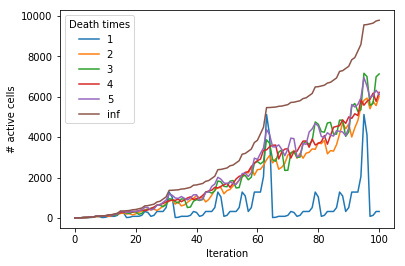

In [5]:
death_times = [1, 2, 3, 4, 5, np.inf]
uws = [UlamWarburton(death_time=i) for i in death_times]
[uw.iterate(steps=100) for uw in uws]
fig, ax = plt.subplots()

for death_time, uw in zip(death_times, uws):
    counts = [np.sum(grid) for grid in uw.history]
    ax.plot(counts, label=death_time)

ax.legend(title="Death times")
ax.set_xlabel("Iteration")
ax.set_ylabel("# active cells")
fig.show()

# Wait time 

Finally, what if cells die but then have to wait to become active after dying? (The `initially_dead` flag assumes all cells just died.)

/home/marcus/.local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


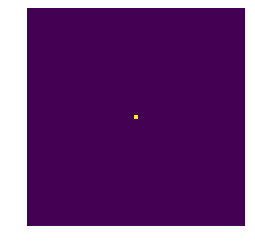

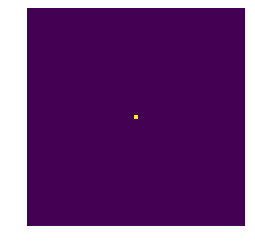

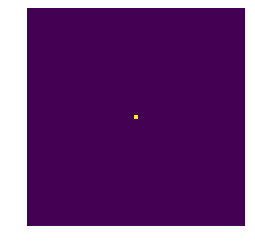

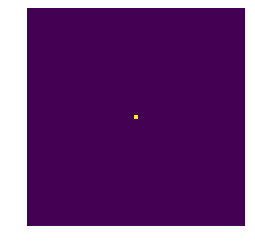

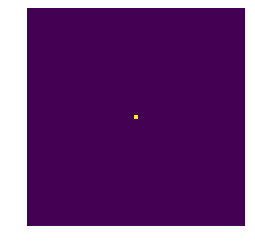

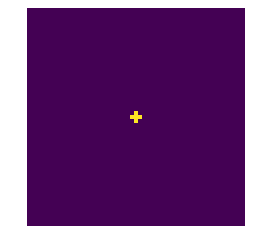

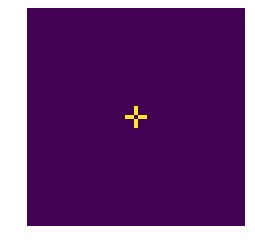

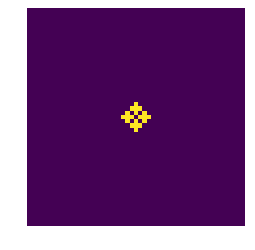

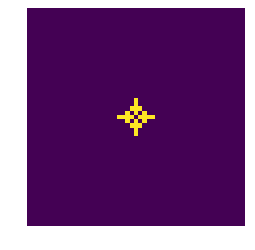

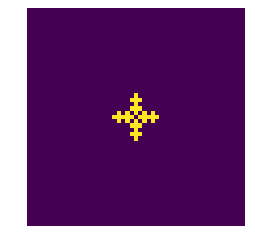

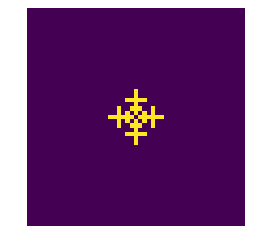

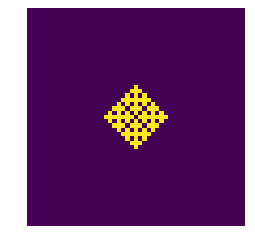

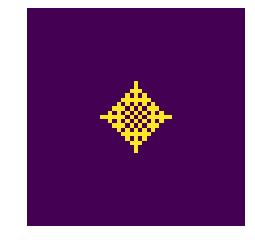

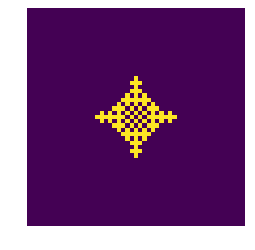

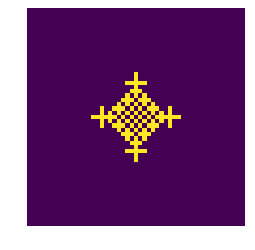

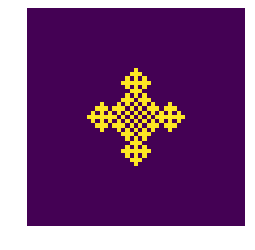

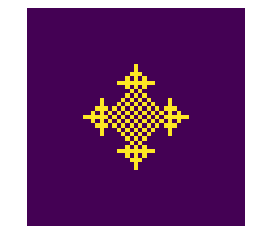

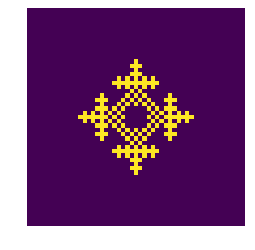

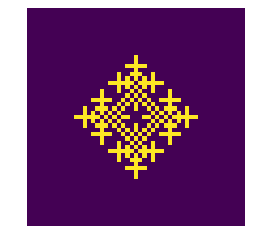

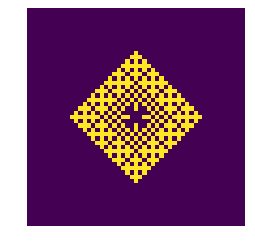

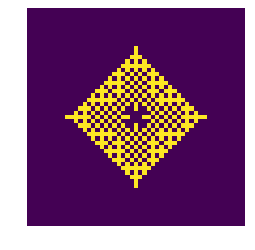

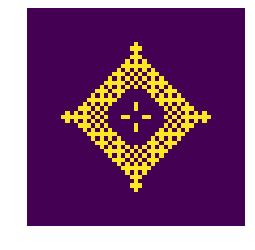

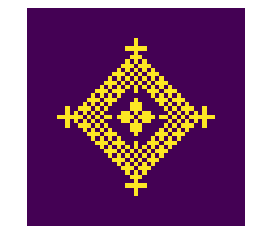

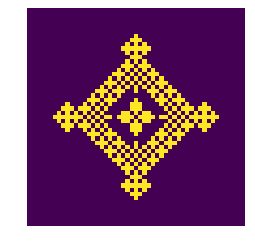

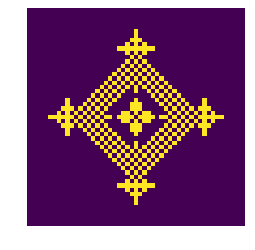

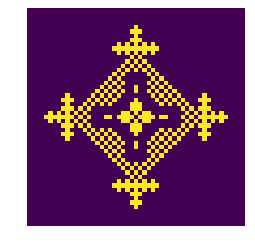

In [6]:
uw = UlamWarburton(initial_size=25, death_time=5, wait_time=5, initially_dead=True)
uw.iterate(steps=25)
for i in range(len(uw.history)):
    uw.show(iteration=i+1)

Again, what about the number of active cells over time?

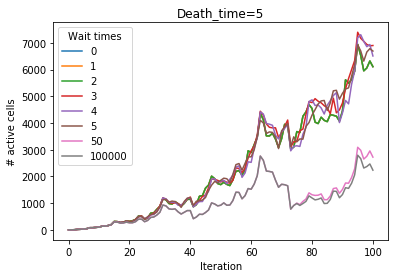

In [7]:
wait_times = [0, 1, 2, 3, 4, 5, 50, 100000]
uws = [UlamWarburton(death_time=5, initially_dead=False, wait_time=i) 
       for i in wait_times]
[uw.iterate(steps=100) for uw in uws]

fig, ax = plt.subplots()

for death_time, uw in zip(wait_times, uws):
    counts = [np.sum(grid) for grid in uw.history]
    ax.plot(counts, label=death_time)

ax.legend(title="Wait times")
ax.set_title("Death_time=5")
ax.set_xlabel("Iteration")
ax.set_ylabel("# active cells")
fig.show()